# 2022-01-16

In [36]:
from typing import Callable, List, Optional

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from numpy.typing import NDArray
from sklearn.metrics import accuracy_score

np.random.seed(42)

import matplotlib.pyplot as plt

In [17]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel("x2")
    plt.xlabel("x1")
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


def load_planar_dataset():
    np.random.seed(42)
    m = 400  # number of examples
    N = int(m / 2)  # number of points per class
    D = 2  # dimensionality
    X = np.zeros((m, D))  # data matrix where each row is a single example
    Y = np.zeros((m, 1), dtype="uint8")  # labels vector (0 for red, 1 for blue)
    a = 4  # maximum ray of the flower

    for j in range(2):
        ix = range(N * j, N * (j + 1))
        t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2  # theta
        r = a * np.sin(4 * t) + np.random.randn(N) * 0.2  # radius
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=0.5, noise=0.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=0.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(
        mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None
    )
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return (
        noisy_circles,
        noisy_moons,
        blobs,
        gaussian_quantiles,
    )

In [18]:
x, y = load_planar_dataset()

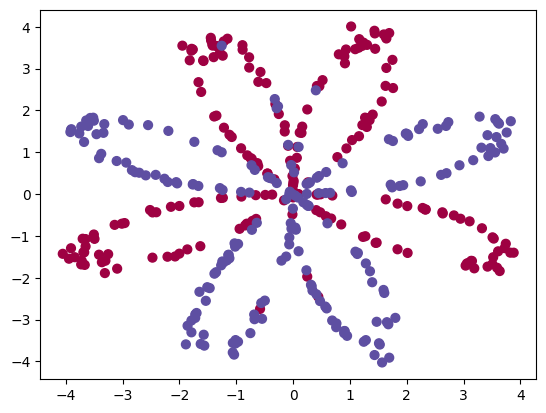

In [19]:
plt.scatter(x[0, :], x[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [9]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
model = LogisticRegressionCV()
model.fit(x.T, y.T)

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Acc:  0.4975


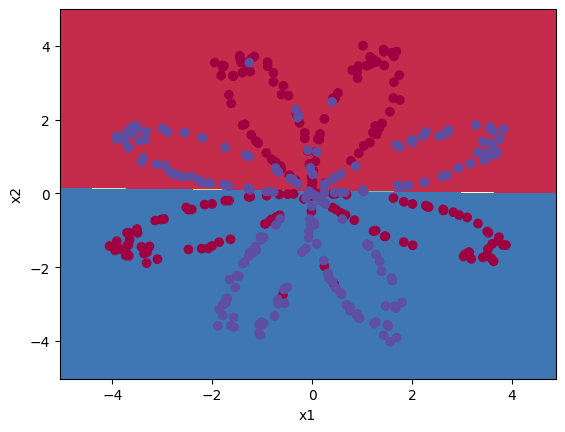

In [27]:
plot_decision_boundary(lambda x: model.predict(x), x, y)
preds = model.predict(x.T)

print("Acc: ", accuracy_score(y.T, preds))

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x.T, y.T)

/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_34138/2416507531.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x.T, y.T)


RandomForestClassifier()

Acc:  1.0


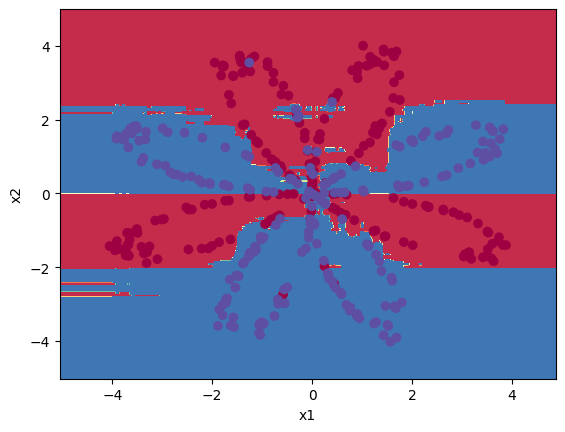

In [32]:
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

In [57]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[1])
model.fit(x.T, y.T)

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[1])

Acc:  0.5


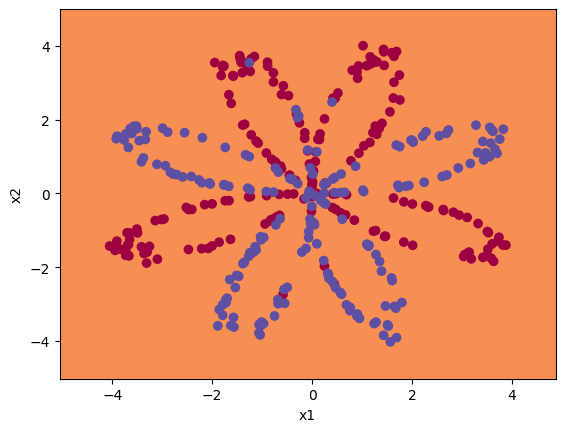

In [58]:
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.6375


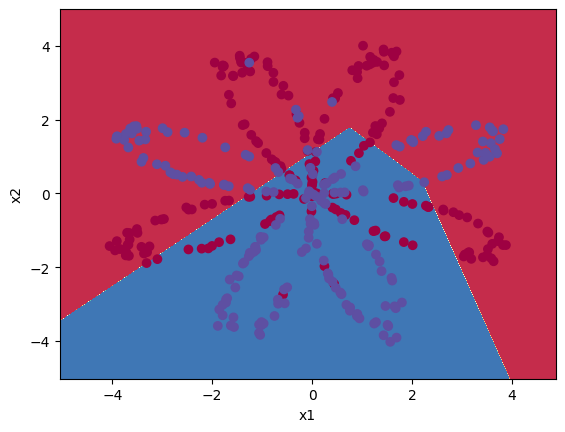

In [59]:
model = MLPClassifier(hidden_layer_sizes=[2])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.4825


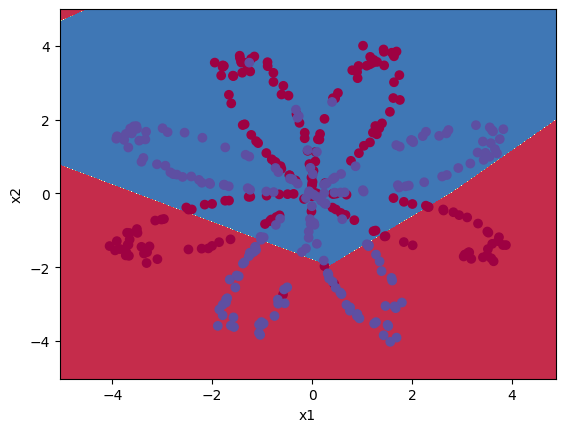

In [60]:
model = MLPClassifier(hidden_layer_sizes=[3])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.6875


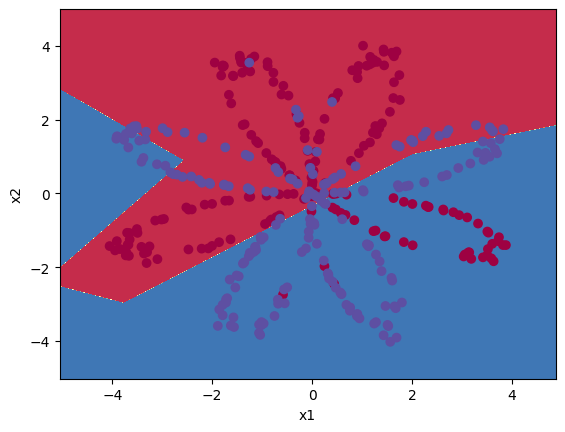

In [61]:
model = MLPClassifier(hidden_layer_sizes=[4])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.5875


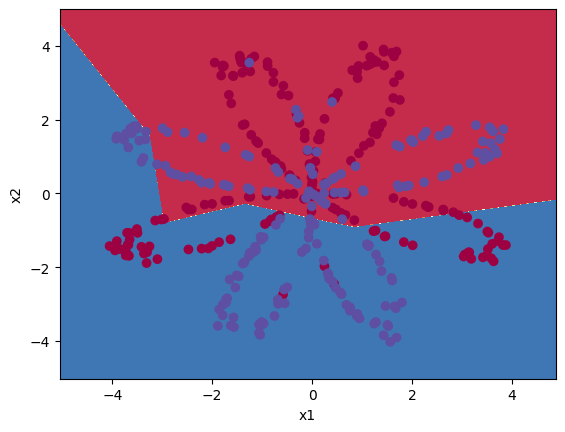

In [62]:
model = MLPClassifier(hidden_layer_sizes=[5])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.615


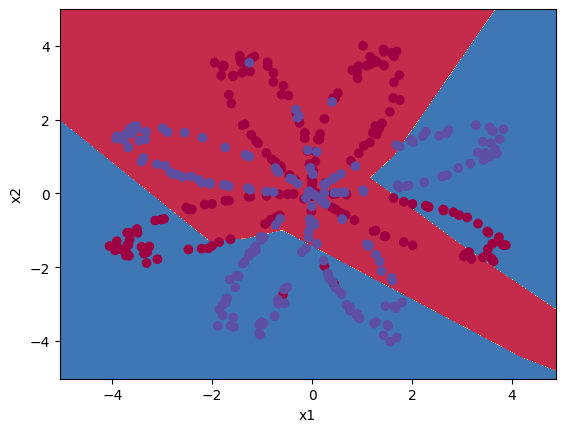

In [63]:
model = MLPClassifier(hidden_layer_sizes=[6])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.695


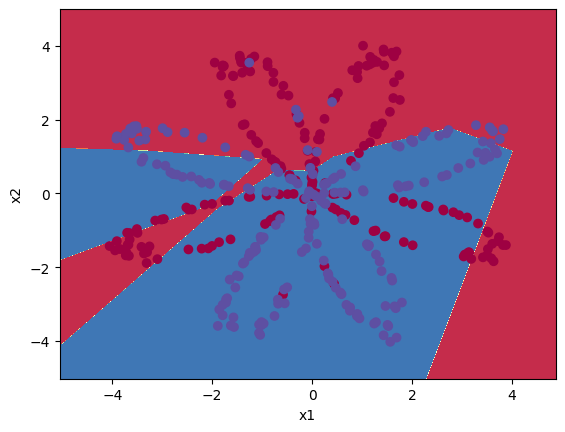

In [64]:
model = MLPClassifier(hidden_layer_sizes=[7])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.5775


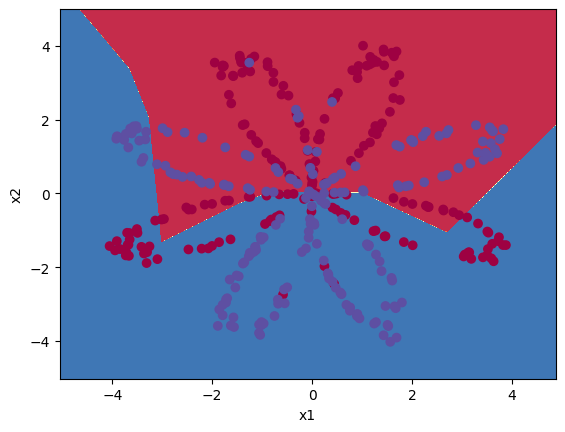

In [65]:
model = MLPClassifier(hidden_layer_sizes=[10])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.67


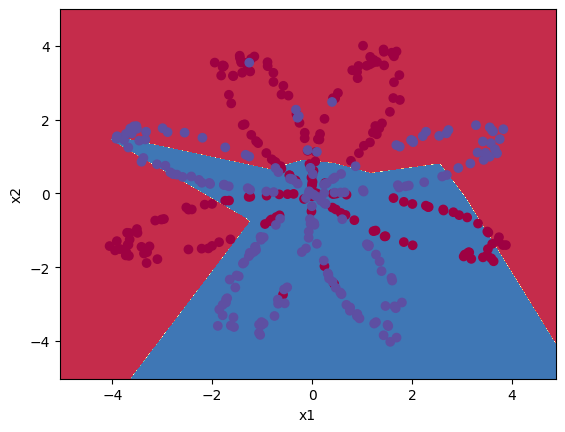

In [67]:
model = MLPClassifier(hidden_layer_sizes=[3, 4])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.8725


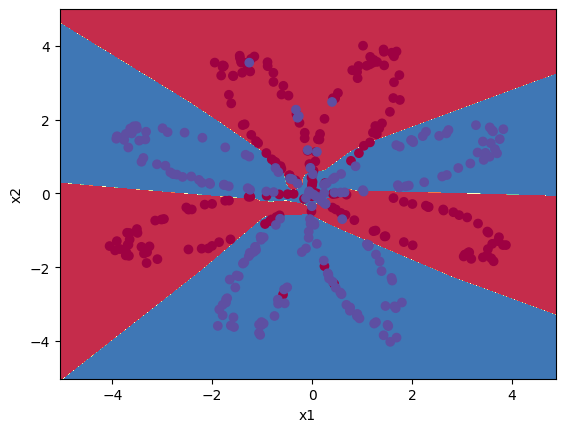

In [68]:
model = MLPClassifier(hidden_layer_sizes=[10, 20])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acc:  0.94


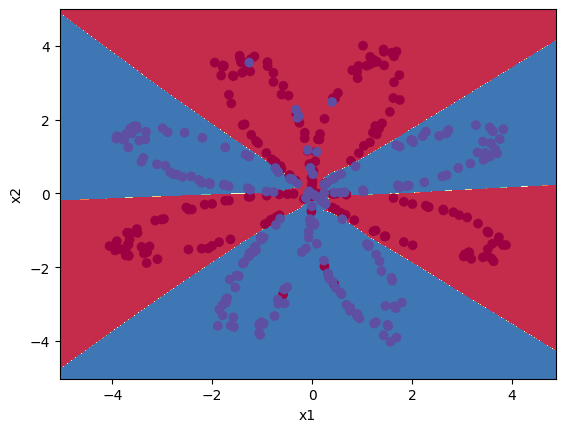

In [69]:
model = MLPClassifier(hidden_layer_sizes=[100, 200, 300])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acc:  0.9525


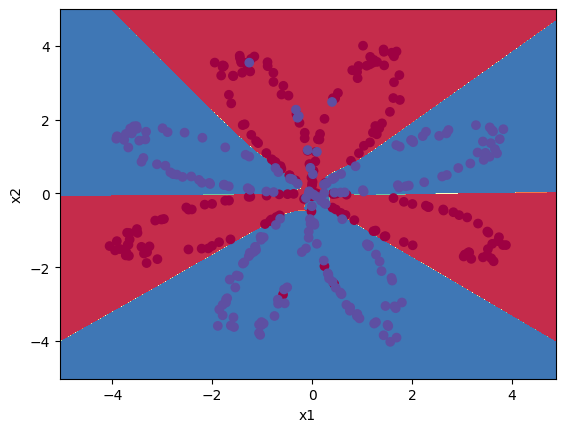

In [70]:
model = MLPClassifier(hidden_layer_sizes=[100, 200, 300, 300])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acc:  0.94


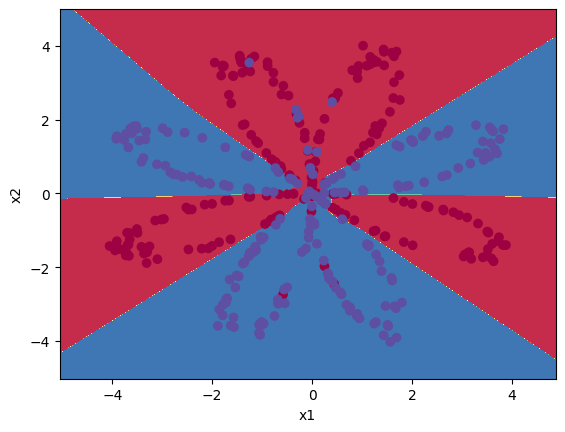

In [71]:
model = MLPClassifier(hidden_layer_sizes=[1000, 200])
model.fit(x.T, y.T)
preds = model.predict(x.T)
plot_decision_boundary(lambda x: model.predict(x), x, y)
print("Acc: ", accuracy_score(y.T, preds))

# MNIST

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [79]:
x = load_digits()["data"]
y = load_digits()["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

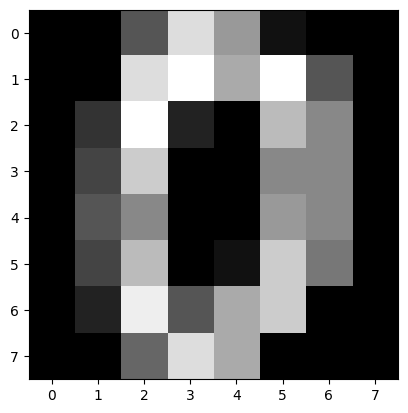

In [77]:
plt.imshow(x.reshape(1797, 8, 8)[0], cmap="gray")

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=[128, 64, 32, 9])
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=[128, 64, 32, 9])

In [86]:
accuracy_score(y_test, mlp.predict(x_test))

0.9711111111111111

In [87]:
mlp.hidden_layer_sizes

[128, 64, 32, 9]

In [93]:
def get_activations(clf, X):
    hidden_layer_sizes = clf.hidden_layer_sizes
    if not hasattr(hidden_layer_sizes, "__iter__"):
        hidden_layer_sizes = [hidden_layer_sizes]
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X.shape[1]] + hidden_layer_sizes + [clf.n_outputs_]
    activations = [X]
    for i in range(clf.n_layers_ - 1):
        activations.append(np.empty((X.shape[0], layer_units[i + 1])))
    clf._forward_pass(activations)
    return activations

In [106]:
activations = get_activations(mlp, x[:5])[-2]

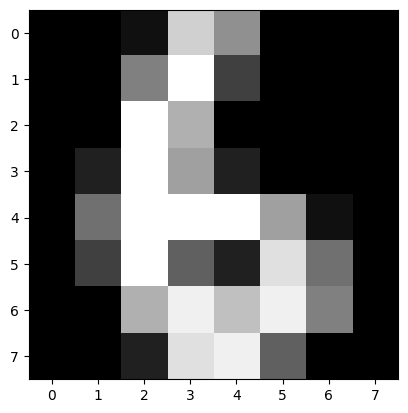

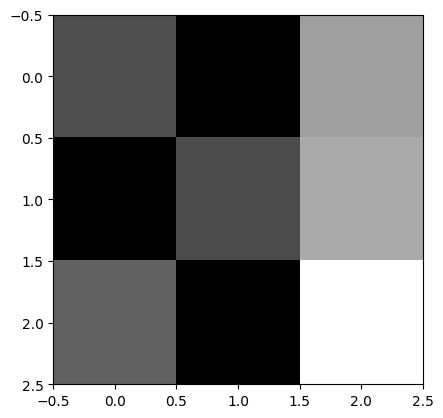

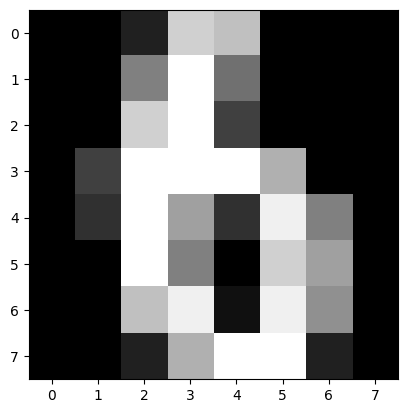

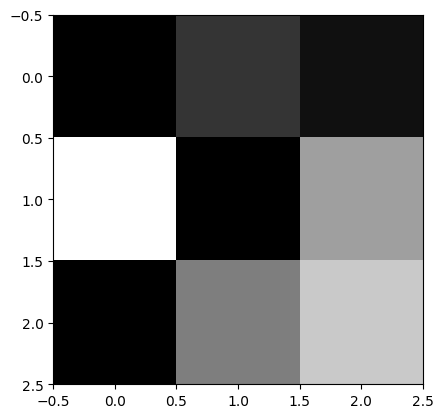

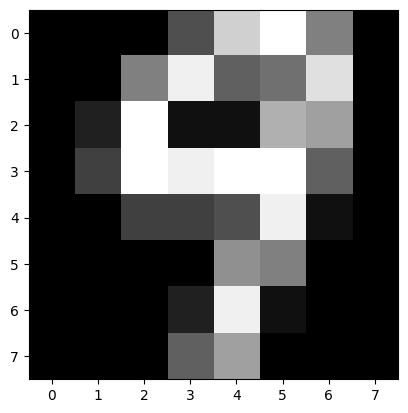

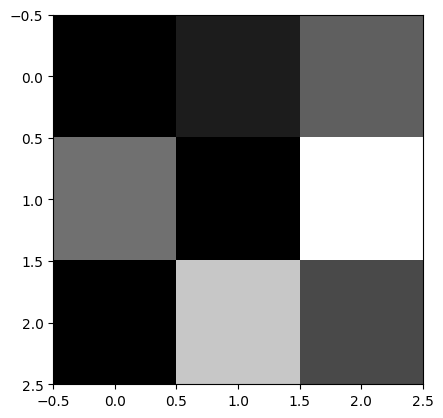

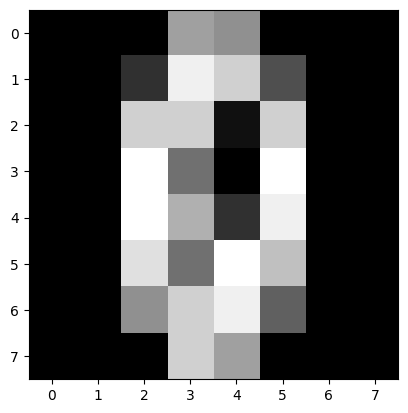

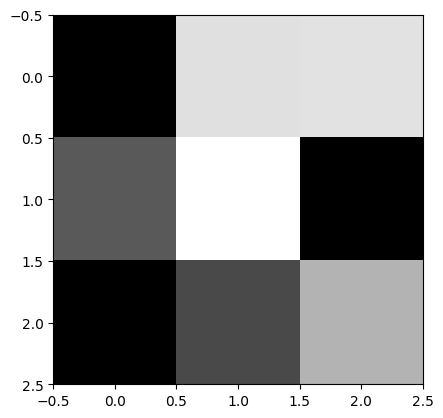

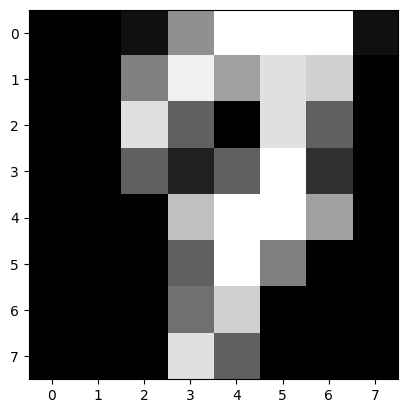

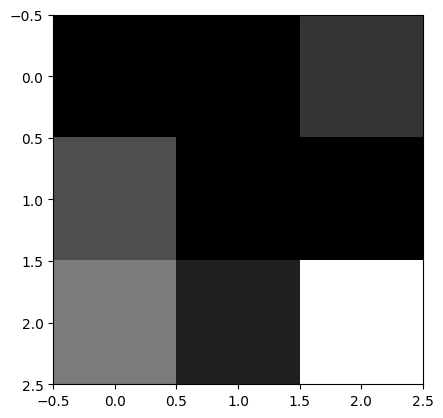

In [109]:
for i, sample in enumerate(x_test[:5]):
    plt.imshow(sample.reshape(8, 8), cmap="gray")
    plt.show()
    plt.imshow(activations[i].reshape(3, 3), cmap="gray")
    plt.show()